In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import random

In [2]:
G = nx.Graph()
label = []
isi_ulang = random.sample(range(1, 14), 4)
print(isi_ulang)
a = 1
b = 1
for i in range(1,15):
    if i in isi_ulang:
        label.append(f"isi ulang {a}")
        a+=1
    else:
        label.append(f"pelanggan {b} kebutuhan {random.randint(1,50)}")
        b+=1

print(label)
pos = {}
kebutuhan = {}
for i in label:
    pos[i] = (random.randint(-15,15),random.randint(-15,15))
    if "pelanggan" in i:
        kebutuhan[i] = int(i[i.find("kebutuhan") + len("kebutuhan ") : ])

pelanggan = [i for i in label if "pelanggan" in i]
pelanggan

[11, 4, 2, 7]
['pelanggan 1 kebutuhan 28', 'isi ulang 1', 'pelanggan 2 kebutuhan 8', 'isi ulang 2', 'pelanggan 3 kebutuhan 19', 'pelanggan 4 kebutuhan 44', 'isi ulang 3', 'pelanggan 5 kebutuhan 7', 'pelanggan 6 kebutuhan 24', 'pelanggan 7 kebutuhan 6', 'isi ulang 4', 'pelanggan 8 kebutuhan 26', 'pelanggan 9 kebutuhan 4', 'pelanggan 10 kebutuhan 12']


['pelanggan 1 kebutuhan 28',
 'pelanggan 2 kebutuhan 8',
 'pelanggan 3 kebutuhan 19',
 'pelanggan 4 kebutuhan 44',
 'pelanggan 5 kebutuhan 7',
 'pelanggan 6 kebutuhan 24',
 'pelanggan 7 kebutuhan 6',
 'pelanggan 8 kebutuhan 26',
 'pelanggan 9 kebutuhan 4',
 'pelanggan 10 kebutuhan 12']

In [3]:
G.add_nodes_from(label) # Menambahkan Node 
edge = list(itertools.permutations(G.nodes,2))
edge = [edge[i] for i in range(0,len(edge),random.randint(4,6))]
edge

[('pelanggan 1 kebutuhan 28', 'isi ulang 1'),
 ('pelanggan 1 kebutuhan 28', 'pelanggan 5 kebutuhan 7'),
 ('pelanggan 1 kebutuhan 28', 'pelanggan 10 kebutuhan 12'),
 ('isi ulang 1', 'isi ulang 3'),
 ('isi ulang 1', 'pelanggan 9 kebutuhan 4'),
 ('pelanggan 2 kebutuhan 8', 'pelanggan 4 kebutuhan 44'),
 ('pelanggan 2 kebutuhan 8', 'pelanggan 8 kebutuhan 26'),
 ('isi ulang 2', 'pelanggan 3 kebutuhan 19'),
 ('isi ulang 2', 'isi ulang 4'),
 ('pelanggan 3 kebutuhan 19', 'pelanggan 2 kebutuhan 8'),
 ('pelanggan 3 kebutuhan 19', 'pelanggan 7 kebutuhan 6'),
 ('pelanggan 4 kebutuhan 44', 'isi ulang 1'),
 ('pelanggan 4 kebutuhan 44', 'pelanggan 6 kebutuhan 24'),
 ('isi ulang 3', 'pelanggan 1 kebutuhan 28'),
 ('isi ulang 3', 'pelanggan 5 kebutuhan 7'),
 ('isi ulang 3', 'pelanggan 10 kebutuhan 12'),
 ('pelanggan 5 kebutuhan 7', 'pelanggan 4 kebutuhan 44'),
 ('pelanggan 5 kebutuhan 7', 'pelanggan 9 kebutuhan 4'),
 ('pelanggan 6 kebutuhan 24', 'pelanggan 3 kebutuhan 19'),
 ('pelanggan 6 kebutuhan 24', 

In [4]:
for i in edge:
    G.add_edge(i[0],i[1],weight = random.randint(1,15))

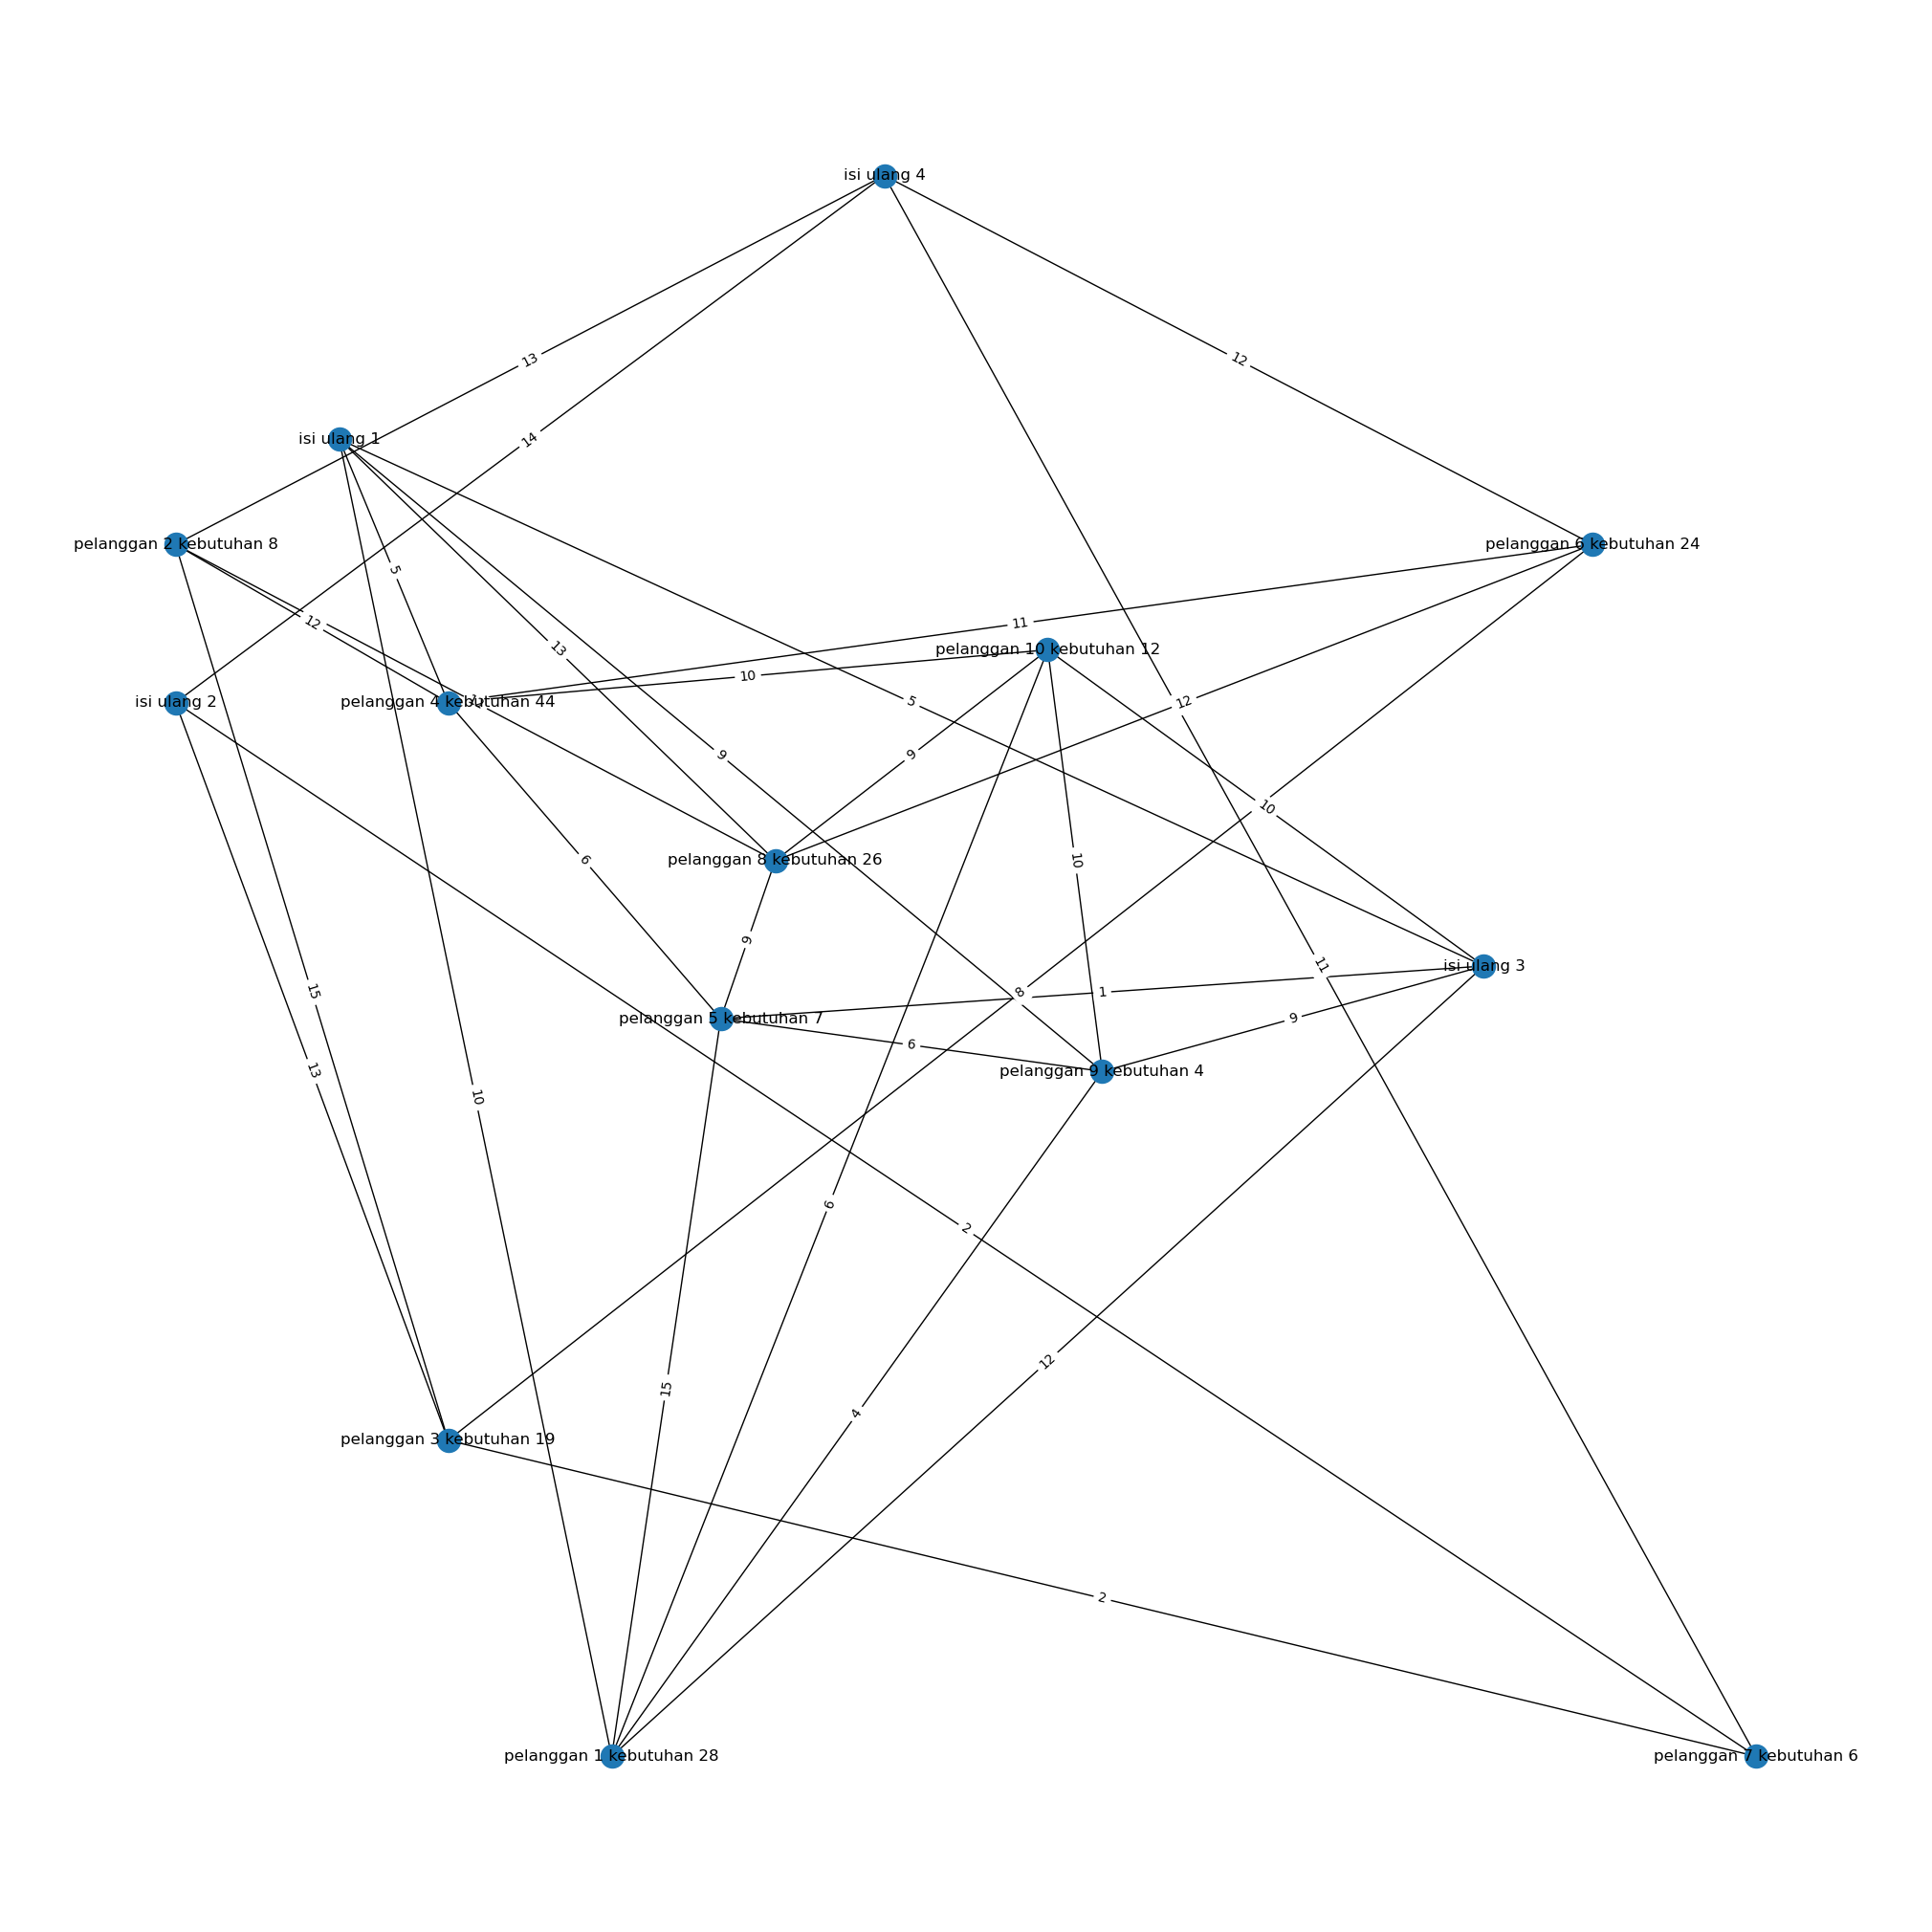

In [5]:
# Visualisasi Graph
plt.figure(figsize=(20,20))
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [6]:
# Mencari kost terdekat pertama dan kedua Kemudian ketiga pergantian node dan mencari node baru dibandingkan apakah cost di node baru lebih kecil daripada cost kembali 
# ditambah kost mininimal kedua di node sebelumnya

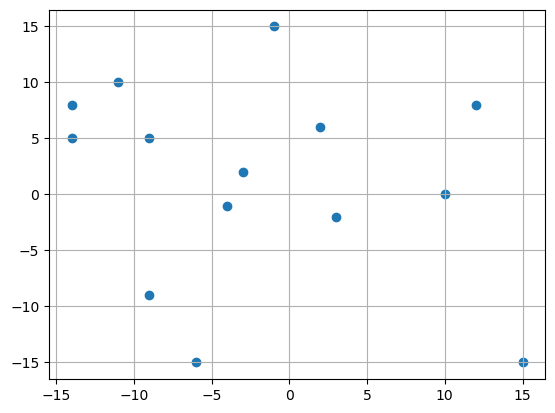

In [7]:
x = [pos[i][0] for i in label]
y = [pos[i][1] for i in label]
plt.scatter(x,y)
plt.grid()
plt.show()

In [8]:
# def telusuri_isi_ulang(start):
#     print("cari galon")
#     path = G.edges(start,data=True)
#     for i in path:
#         if 'isi ulang' in i[1]:
#             print(i[1])
#             return i[1]
#     return 0
    
# def telusuri(start,galon,closed):
#     current = start
#     for i in G.edges(start,data=True):
#         if galon > 0 and "isi ulang" not in i[1]:
#             if min > i[2]['weight'] and galon >= kebutuhan[i[1]] and i[1] not in current:
#                 min = i[2]['weight']
#                 current = i[1]
         
#     if galon - kebutuhan[current] > 0:
#         galon -= kebutuhan[current]
#         closed.append(current)    
#     elif current == start or galon <= 0:
#         current = telusuri_isi_ulang(current)
#         if current != 0:
#             galon = 50
    
#     print(f"posisi saat ini {current} dan sisa galon {galon}")
#     telusuri(current,galon,closed)

# start = f"isi ulang {random.randint(1,4)}"
# galon = 50
# closed = []

# telusuri(start,galon,closed)

In [9]:
import math

def hitung_garis_lurus(i):
    nilai_x = math.pow((pos[i[1]][0] - pos[i[0]][0]),2)
    nilai_y = math.pow((pos[i[1]][1] - pos[i[0]][1]),2)
    return math.sqrt(nilai_y + nilai_x)

garis_lurus = []
for i in edge:
    garis_lurus.append(hitung_garis_lurus(i))

In [10]:
def cari_depo(start,path_maps):
    path = sorted(G.edges(start,data=True), key=lambda edge: edge[2]['weight'])
    for i in path:
        if "isi ulang" in i[1]:
            path_maps.append(f"-> reload di depo {i[1]} sisa galon = 50")
            return i[1]        
    print(path[0][1])
    path_maps.append(f"->menuju depo lewat {path[0][1]}")
    return cari_depo(path[0][1],path_maps)    

def telusuri(start,galon,closed,path_maps):
    current = start
    # generate all posible path
    path = sorted(G.edges(start,data=True), key=lambda edge: edge[2]['weight'])
    if len(pelanggan) != 0:
        for i in path:
            if "isi ulang" not in i[1] and i[1] not in closed and galon >= kebutuhan[i[1]]:
                current = i[1] # memindahkan ke node yang bary
                closed.append(current) # menutup node yang pernah dikunjungi agar tidak diberikan galon lagi
                pelanggan.remove(i[1])
                galon -= kebutuhan[current]
                path_maps.append(f"->{current} weight {i[2]['weight']} sisa galon = {galon}")
                return telusuri(current,galon,closed,path_maps)
        if start == current:
            start = cari_depo(current,path_maps)
            galon = 50
            telusuri(start,galon,closed,path_maps)

start = f"isi ulang {random.randint(1,4)}"
galon = 50
closed = []
path_map = [start]
cost = 0
telusuri(start,galon,closed,path_map)
path_map

['isi ulang 4',
 '->pelanggan 7 kebutuhan 6 weight 11 sisa galon = 44',
 '->pelanggan 3 kebutuhan 19 weight 2 sisa galon = 25',
 '->pelanggan 6 kebutuhan 24 weight 8 sisa galon = 1',
 '-> reload di depo isi ulang 4 sisa galon = 50',
 '->pelanggan 2 kebutuhan 8 weight 13 sisa galon = 42',
 '->pelanggan 8 kebutuhan 26 weight 12 sisa galon = 16',
 '->pelanggan 5 kebutuhan 7 weight 9 sisa galon = 9',
 '->pelanggan 9 kebutuhan 4 weight 6 sisa galon = 5',
 '-> reload di depo isi ulang 1 sisa galon = 50',
 '->pelanggan 4 kebutuhan 44 weight 5 sisa galon = 6',
 '-> reload di depo isi ulang 1 sisa galon = 50',
 '->pelanggan 1 kebutuhan 28 weight 10 sisa galon = 22',
 '->pelanggan 10 kebutuhan 12 weight 6 sisa galon = 10']